In [63]:
import torch.nn as nn
import torchvision
from matplotlib import pyplot as plt
import numpy as np

In [132]:
class AlexNet(nn.Module):
  def __init__(self,num_classes=100):
    super().__init__()
    self.features = nn.Sequential(
      nn.AdaptiveAvgPool2d((256,256)),
      nn.Conv2d(1,64,kernel_size=11,stride=4,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),

      nn.Conv2d(64,192,kernel_size=5,stride=1,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
      
      nn.Conv2d(192,384,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace=True),

      nn.Conv2d(384,256,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace = True),
           
      nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1),
      nn.ReLU(inplace = True),
      nn.MaxPool2d(kernel_size = 3, stride = 2)

    );

    self.classifier = nn.Sequential(
        nn.AdaptiveAvgPool2d((6,6)),
        nn.Flatten(),
        nn.Dropout(0.5),
        nn.Linear(256*6*6,4096),
        nn.ReLU(inplace = True),
        nn.Dropout(p = 0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace = True),
        nn.Linear(4096, num_classes)
    )
  def forward(self,x):
    x = self.features(x);
    x = self.classifier(x)
    return x

In [133]:

def alexnet(pretrained = False, **kwargs):
    model = AlexNet(**kwargs)
    if pretrained:
        raise Exception("pretrained model is not implemented yet")

    return model

In [134]:
### Loading Datasets

In [135]:
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

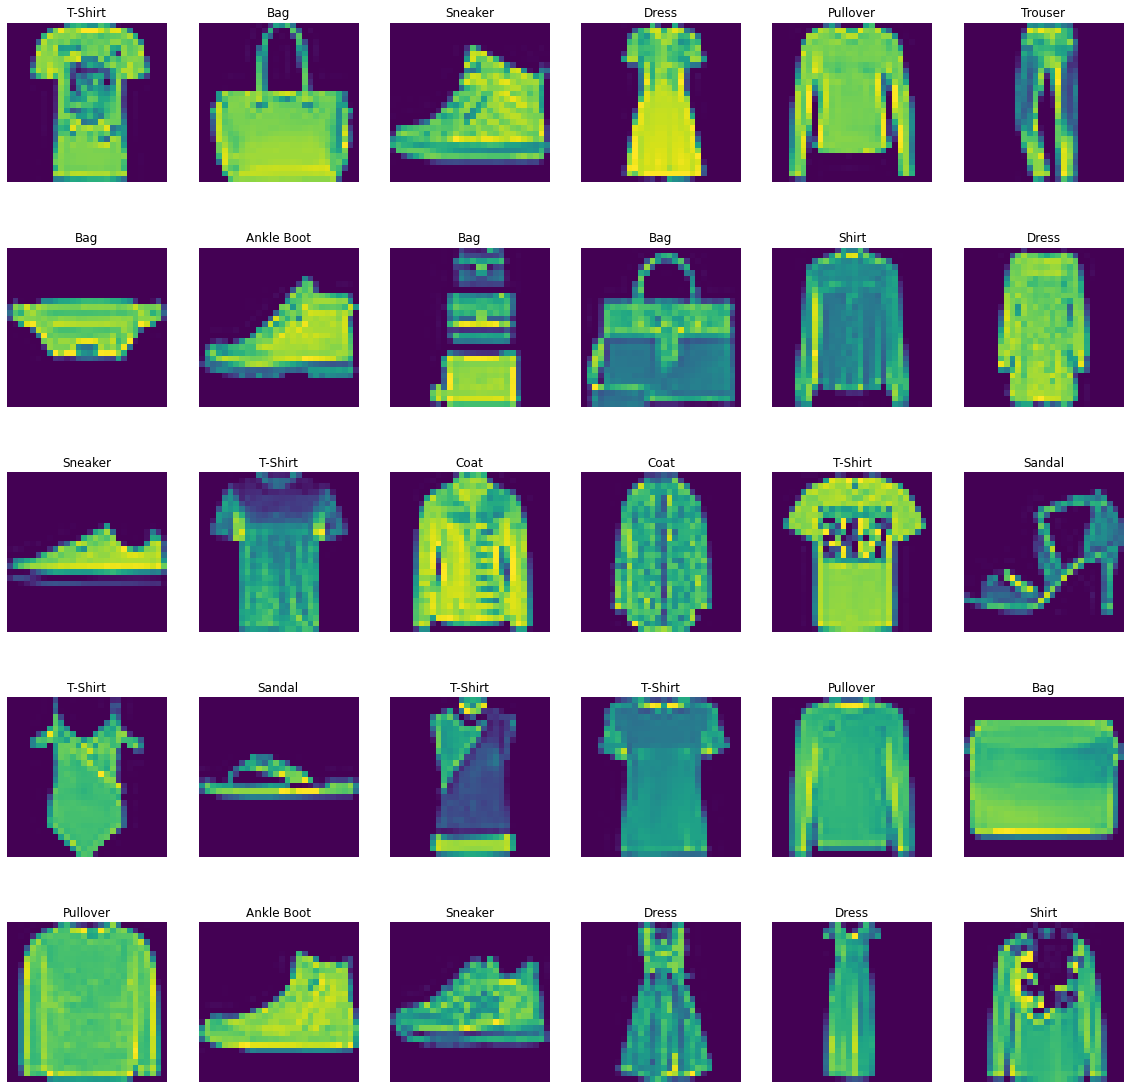

In [136]:
random_id = np.random.randint(len(training_data),size=(30))
plt.figure(figsize=(20,20))
for i,id in enumerate(random_id):
  plt.subplot(5,6,i+1)
  image = training_data[id][0].squeeze()
  label = labels_map[training_data[id][1]]
  plt.title(label)
  plt.axis('off')
  plt.imshow(image)

In [137]:
ds = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=torchvision.transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
trainloader = torch.utils.data.DataLoader(ds, batch_size=100,
                                          shuffle=True, num_workers=2)

In [138]:
mynet = alexnet(num_classes=10)

In [139]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mynet.parameters(),lr=0.001,momentum=0.9)

In [152]:
running_loss = 0
for epoch in range(2):
  for i,data in enumerate(trainloader,0):
    inputs,labels = data

    optimizer.zero_grad()

    outputs = mynet(inputs)
    loss = criterion(outputs,torch.argmax(labels,axis=1))
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

KeyboardInterrupt: ignored

In [150]:
criterion(outputs,torch.argmax(labels,axis=1))

tensor(2.3026, grad_fn=<NllLossBackward>)